In [1]:
!pip install fastai -q --upgrade

In [2]:
!pip install pyyaml

In [3]:
from fastai  import *
from fastai.vision.all import *
from fastai.imports import *
import yaml,cv2,os
from torchvision import transforms as T
from torchvision.transforms import functional as F

In [6]:
root = Path("/content/data1")

In [7]:
os.mkdir(root)
os.chdir(root)

In [8]:
!curl -L "https://public.roboflow.com/ds/pK9BobmV9A?key=G9IUWXkCZA" > roboflow.zip;unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   897  100   897    0     0   1648      0 --:--:-- --:--:-- --:--:--  1645
100 77.9M  100 77.9M    0     0  73.0M      0  0:00:01  0:00:01 --:--:-- 73.0M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.0b55f43ac16aa65c889558d8ea757072.jpg  
 extracting: test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.9ce88078ea356949f4ab7ad9cfdfc62d.jpg  
 extracting: test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.91ad9df05bd1f86bab67c8368ae5e4ad.jpg  
 extracting: test/images/410993714e325a1de3e394ffe860df3a_jpg.rf.519bf0fdbd5e38cd44cae1cfebc98536.jpg  
 extracting: test/images/4e3117459d759798537eb52cf5bf534d_jpg.rf.5b99421bf416463a8c75c

In [9]:
with open(root/"data.yaml") as file:
    data = yaml.load(file)
data

{'names': ['bishop',
  'black-bishop',
  'black-king',
  'black-knight',
  'black-pawn',
  'black-queen',
  'black-rook',
  'white-bishop',
  'white-king',
  'white-knight',
  'white-pawn',
  'white-queen',
  'white-rook'],
 'nc': 13,
 'train': '../train/images',
 'val': '../valid/images'}

In [10]:
classes = data['names']

In [11]:
classes[10]

'white-pawn'

In [12]:
path_train = Path("/content/data/train")
path_val = Path("/content/data/valid")
path_test = Path("/content/data/test")


In [13]:
train_images = get_image_files(path_train/"images")

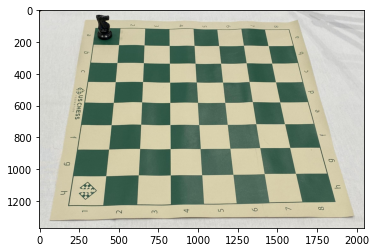

In [14]:
img = cv2.imread(str (train_images[-1]),cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [15]:
img.shape

(1371, 2048, 3)

In [16]:
f = train_images[-1].name[:-4] + ".txt"
with open(root/"train"/"labels"/f, 'r') as file:
  targets = file.read()
targets = targets.split("\n")
targets

['3 0.201171875 0.0794460641399417 0.05615234375 0.119533527696793']

In [17]:
row = [f, *targets[0].split(" ")]
row

['47e842dd95735a11cf92c0ddf1161193_jpg.rf.fa045b4cdedb6dbeea6226d5e5d58a5c.txt',
 '3',
 '0.201171875',
 '0.0794460641399417',
 '0.05615234375',
 '0.119533527696793']

In [18]:
col = ["name","class","center_x","center_y","width","height"]
train_df = pd.DataFrame(columns=col)
train_df

,name,class,center_x,center_y,width,height


In [19]:
row = {}
row[col[0]] = f[:-4]
for i,t in enumerate(targets[0].split(" ")):
    row[col[i+1]] = float(t)
row

{'center_x': 0.201171875,
 'center_y': 0.0794460641399417,
 'class': 3.0,
 'height': 0.119533527696793,
 'name': '47e842dd95735a11cf92c0ddf1161193_jpg.rf.fa045b4cdedb6dbeea6226d5e5d58a5c',
 'width': 0.05615234375}

In [20]:
train_df.append(row,ignore_index=True)

,name,class,center_x,center_y,width,height
0,47e842dd95735a11cf92c0ddf1161193_jpg.rf.fa045b4cdedb6dbeea6226d5e5d58a5c,3.0,0.201172,0.079446,0.056152,0.119534


In [23]:
# Data frame

def get_targets(image_path):
    f = image_path.name[:-4] + ".txt"
    with open((image_path.parent).parent/"labels"/f,'r') as file:
        targets = file.read()
    return targets.split('\n')


def get_row(image_path,target,col):
    row = {}
    row[col[0]] = image_path.name[:-4]
    for i,t in enumerate(target.split(" ")):
        try:
            row[col[i+1]] = float(t)
        except:
            print("Could not convert {} to float".format(t))
    return row

def add_targets_to_df(df,image_path):
    targets = get_targets(image_path)
    df_new = df
    for target in targets:
        row = get_row(image_path,target, df.columns)
        df_new = df_new.append(row,ignore_index=True)
    return df_new
    

def create_df(cols,images_path):
    df = pd.DataFrame(columns=col)
    for path in images_path:
        df = add_targets_to_df(df,path)
    return df


In [24]:
final_df = create_df(col,train_images)


In [26]:
final_df

,name,class,center_x,center_y,width,height
0,b79ae5b70de58089ead6e32b235e30d3_jpg.rf.68c670de3208dc56613dc9b9f65ec934,2.0,0.769043,0.298105,0.082031,0.209184
1,b79ae5b70de58089ead6e32b235e30d3_jpg.rf.68c670de3208dc56613dc9b9f65ec934,1.0,0.598633,0.155248,0.050293,0.141399
2,b79ae5b70de58089ead6e32b235e30d3_jpg.rf.68c670de3208dc56613dc9b9f65ec934,6.0,0.571289,0.077988,0.062500,0.130466
3,b79ae5b70de58089ead6e32b235e30d3_jpg.rf.68c670de3208dc56613dc9b9f65ec934,6.0,0.520996,0.435860,0.070801,0.156706
4,b79ae5b70de58089ead6e32b235e30d3_jpg.rf.68c670de3208dc56613dc9b9f65ec934,4.0,0.682129,0.339650,0.057129,0.115889
...,...,...,...,...,...,...
2103,IMG_0298_JPG.rf.388fb04c02f369a0c79a524343fe590c,4.0,0.346680,0.437318,0.054688,0.124636
2104,IMG_0298_JPG.rf.388fb04c02f369a0c79a524343fe590c,10.0,0.354492,0.559038,0.061035,0.124636
2105,IMG_0298_JPG.rf.388fb04c02f369a0c79a524343fe590c,10.0,0.259766,0.341837,0.061035,0.120262
2106,IMG_0298_JPG.rf.388fb04c02f369a0c79a524343fe590c,8.0,0.165527,0.404519,0.099121,0.214286
